In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

plt.style.use("ggplot")

In [2]:
csv_comunas = "https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/confirmados_comunas.csv"
csv_regiones = "https://raw.githubusercontent.com/jorgeperezrojas/covid19-data/master/csv/confirmados.csv"

In [3]:
comunas = pd.read_csv(csv_comunas)
regiones = pd.read_csv(csv_regiones)

# Correccion de tipo de datos y reemplazo de los NaNs por 0
comunas.loc[:,'03/30/2020':] = comunas.loc[:,'03/30/2020':].apply(pd.to_numeric, errors ='coerce', downcast='integer')
comunas = comunas.fillna(0)

In [4]:
### Datos de Regiones ### 
reg_select = regiones.loc[:, "region" :]
reg_select = reg_select.set_index('region')
reg_select_t = reg_select.transpose()
reg_select_t.index = pd.to_datetime(reg_select_t.index)

In [5]:
### Datos de Comunas ###
com_select = comunas.loc[:, "comuna":]
com_select = com_select.set_index('comuna')
com_select_t = com_select.transpose()
com_select_t.index = pd.to_datetime(com_select_t.index)

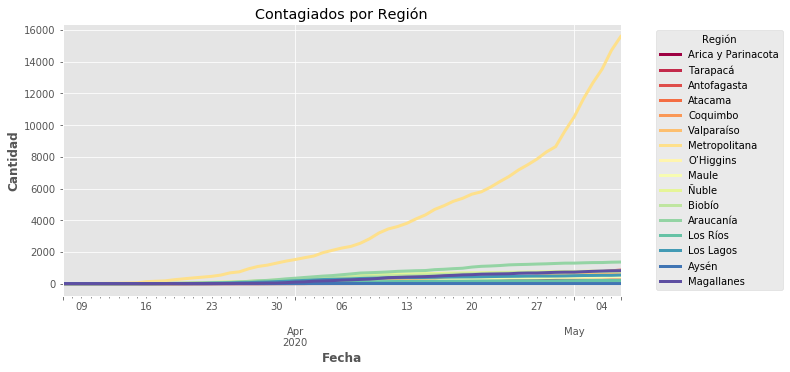

In [6]:
### Gráfico de contagiados por Region ###

reg_select_t.plot(title="Contagiados por Región", 
                  figsize=(10,5), colormap= cm.Spectral, linewidth=3)
plt.xlabel("Fecha",fontweight="bold")
plt.ylabel("Cantidad",fontweight="bold")
legend = plt.legend(title="Región",loc=5,bbox_to_anchor=(1.3,0.5))

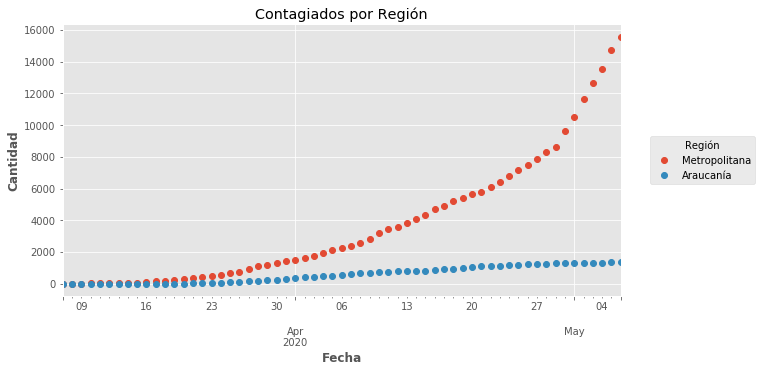

In [7]:
### Ejemplo usando dos Regiones ###

reg_select_t.loc[:,['Metropolitana','Araucanía']].plot( title="Contagiados por Región",
                                                       figsize=(10,5), style='o')

plt.xlabel("Fecha",fontweight="bold")
plt.ylabel("Cantidad",fontweight="bold")
legend = plt.legend(title="Región",loc=5,bbox_to_anchor=(1.25,0.5))

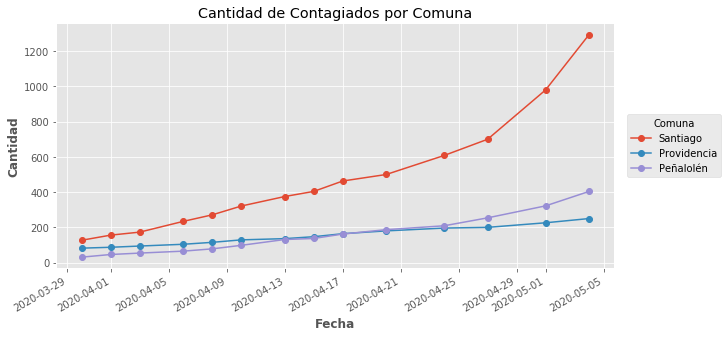

In [8]:
### Ejemplo de Grafico de Comunas ###

com_ejemplo = ['Santiago','Providencia', 'Peñalolén']

com_select_t.loc[:, com_ejemplo].plot(title='Cantidad de Contagiados por Comuna',
                                                                  style='o-', figsize=(10,5), 
                                                                  colormap='jet', subplots=0, sharey=0)
plt.xlabel("Fecha",fontweight="bold")
plt.ylabel("Cantidad",fontweight="bold")
legend = plt.legend(title="Comuna",loc=5,bbox_to_anchor=(1.2,0.5))

In [9]:
# Los valores de contagiados estan muestreados a intervalos irregulares, para resolver esto hacemos lo siguiente:
# 1) Generamos un remuestreo diario y obtenenos NaNs en los dias sin datos (esperable)
# 2) Se implementa interpolación 
### Ref: https://dl.acm.org/doi/pdf/10.1145/321607.321609

com_resampled = com_select_t.resample('1D').interpolate(method='akima')


In [10]:
### Se obtienen estadísticas para obtener los valores máximos para cada comuna ###

stats = com_resampled.describe()
stats_sorted = stats.sort_values(by='max', axis=1, ascending=False)

In [11]:
top_five = stats_sorted.columns[0:5].tolist()
test_comuna = com_resampled.loc[:,top_five]

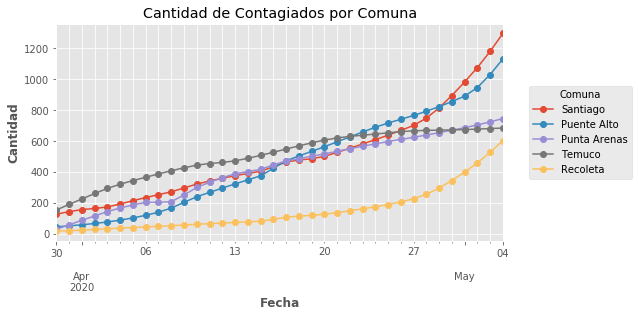

In [12]:
### Ejemplo de Gráfico usando las 5 comunas con mayor número de contagiados ###

test_comuna.plot(title='Cantidad de Contagiados por Comuna', 
                     style='o-', figsize=(8,4), colormap='jet', 
                     subplots=0, sharey=0)

plt.xlabel("Fecha",fontweight="bold")
plt.ylabel("Cantidad",fontweight="bold")
legend = plt.legend(title="Comuna",loc=5,bbox_to_anchor=(1.3,0.5))
plt.grid(True, which='both')

In [13]:
com_diff = com_resampled.diff()
com_diff.columns += '_diff'
com_r_diff = pd.concat([com_resampled, com_diff], axis=1, sort=False)

In [14]:
### Ejemplo de comunas para los gráficos que siguen ###

com_test01 = 'Santiago'
com_test02 = 'La Florida'

Text(0, 0.5, 'Casos Nuevos Por Día')

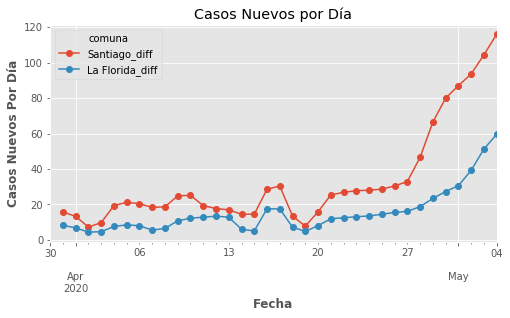

In [15]:
com_diff.loc[:,[com_test01+ '_diff', com_test02+ '_diff']].plot(style='o-', figsize=(8,4))

plt.title('Casos Nuevos por Día')
plt.xlabel("Fecha",fontweight="bold")
plt.ylabel("Casos Nuevos Por Día",fontweight="bold")



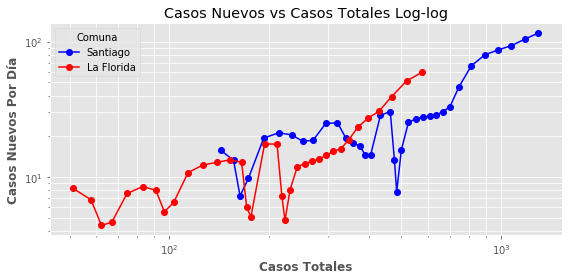

In [16]:
### Gráfico de casos nuevos vs Casos totales para dos comunas ###

ax = com_r_diff.plot(x=com_test01, y=com_test01 + '_diff', style='bo-', label=com_test01, figsize=(8,4))

com_r_diff.plot(ax=ax, x=com_test02, y=com_test02 + '_diff', style='ro-', label=com_test02)

plt.yscale('log')
plt.xscale('log')
plt.title('Casos Nuevos vs Casos Totales Log-log')
plt.xlabel("Casos Totales",fontweight="bold")
plt.ylabel("Casos Nuevos Por Día",fontweight="bold")
plt.grid(True, which='minor')
legend = plt.legend(title="Comuna")
plt.tight_layout()

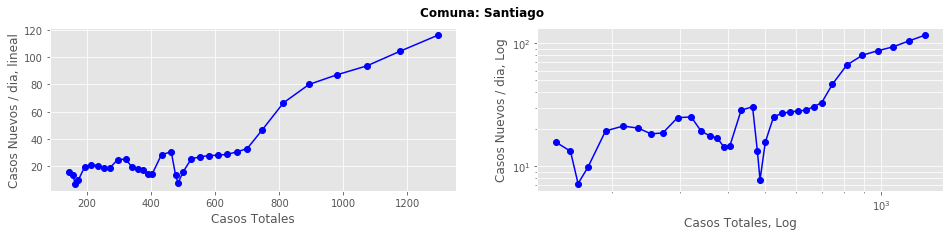

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

com_r_diff.plot(x=com_test01, y=com_test01 + '_diff', style='bo-', ax=axes[0], legend=False )

plt.suptitle('Comuna: ' + com_test01, fontweight="bold")
axes[0].set_xlabel('Casos Totales')
axes[0].set_ylabel('Casos Nuevos / dia, lineal')

com_r_diff.plot(x=com_test01, y=com_test01 + '_diff', style='bo-', ax=axes[1], legend=False )

axes[1].set_xlabel('Casos Totales, Log')
axes[1].set_ylabel('Casos Nuevos / dia, Log')
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='minor') 